In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
from html.parser import HTMLParser
import matplotlib.pyplot as plt
import matplotlib as mtp
#from numba import jit 
import copy
#import numba as nb

In [2]:
mtp.rcParams['figure.figsize'] = [10, 10]
sns.set_context('paper', font_scale=2)

In [151]:
data = pd.read_csv('dialogues.tsv', sep='\t', header=0)

In [152]:
data.dialogue[3]

'<span class=participant_2>Пользователь 2: Здравствуйте</span><br /><span class=participant_2>Пользователь 2: Я Леша</span><br /><span class=participant_1>Пользователь 1: Здравствуйте</span><br /><span class=participant_1>Пользователь 1: Я Егор</span><br /><span class=participant_2>Пользователь 2: Я учусь в 6 классе</span><br /><span class=participant_1>Пользователь 1: А мне 30 и я уже работаю</span><br /><span class=participant_2>Пользователь 2: А я тоже хочу. На машину скопить.</span><br /><span class=participant_1>Пользователь 1: Правда мне не нравится моя работа</span><br /><span class=participant_2>Пользователь 2: Почему?</span><br /><span class=participant_1>Пользователь 1: Мало платят</span><br /><span class=participant_1>Пользователь 1: На семью не хватает</span><br /><span class=participant_1>Пользователь 1: Жена и трое детей</span><br /><span class=participant_2>Пользователь 2: А... а я на машину...</span><br /><span class=participant_2>Пользователь 2: Ого</span><br />'

In [153]:
phrases = []

In [154]:
class DataParser(HTMLParser):
    def handle_data(self, data):
        splitted = data.split(':')
        filtered =  re.sub("[^\u0430-\u044F ]", "", ''.join(splitted[1:]).lower())
        phrases.append(filtered)

In [155]:
parser = DataParser()

In [156]:
for episode in data["dialogue"].to_numpy().tolist():
    parser.feed(episode)

In [157]:
phrases[101]

' я продавец выращиванию овощи и фрукты на даче и продаю'

In [158]:
firstDimenstion = dict()

In [159]:
def incOrAdd(key, dictionary):
    if key not in dictionary:
        dictionary[key] = 1
    else: 
        dictionary[key] += 1

In [160]:
for phrase in phrases:
    for symb in phrase:
        if symb != ' ':
            incOrAdd(symb, firstDimenstion)
        
            

In [161]:
firstDimenstion["в"]

220827

In [162]:
labels = [['й', 'ц', 'у', 'к', 'е', 'н', 'г', 'ш', 'щ', 'з', 'х', 'ъ'], 
             ['ф', 'ы', 'в', 'а', 'п', 'р', 'о', 'л', 'д', 'ж', 'э', ''],
              ['я', 'ч', 'с', 'м', 'и', 'т', 'ь', 'б', 'ю', '', '', '']]

In [163]:
depth = []
for row in labels: 
    drow = []
    for label in row:
        if label != '':
            drow.append(firstDimenstion[label])
        else: 
            drow.append(0)
    depth.append(drow)


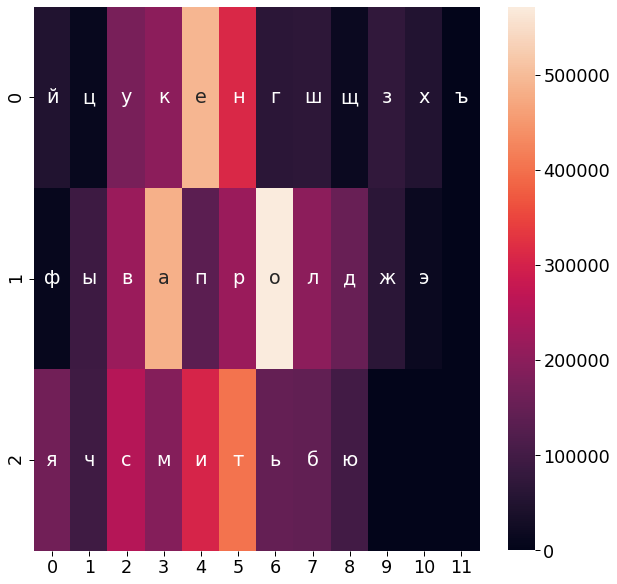

In [164]:
fig, ax = plt.subplots()
ax = sns.heatmap(np.array(depth), annot = np.array(labels), fmt = '')

In [165]:
groups = ["йфя","цыч","увс","камепи","нртгоь","шлб","щдю","зжхэъ"]

In [166]:
def generateSparse(depth):
    sparseDimension = dict()
    for phrase in phrases:
        words = phrase.split(' ')
        for word in words:
            if len(word) > depth:
                length = len(word)
                for i,letter in enumerate(word):
                    if i+depth < length:
                        incOrAdd((letter,word[i+depth]), sparseDimension)
    return sparseDimension
                

In [167]:
sparse = generateSparse(1)

In [168]:
offset = 1072

In [169]:
delta = ord('я') - ord('а') +1

In [170]:
sparseArray = np.zeros((delta, delta))



In [171]:
for key in sparse:
    sparseArray[ord(key[0])-offset][ord(key[1])-offset] = sparse[key]

In [172]:
x_axis_labels = [chr(x) for x in range (offset,offset+delta)]

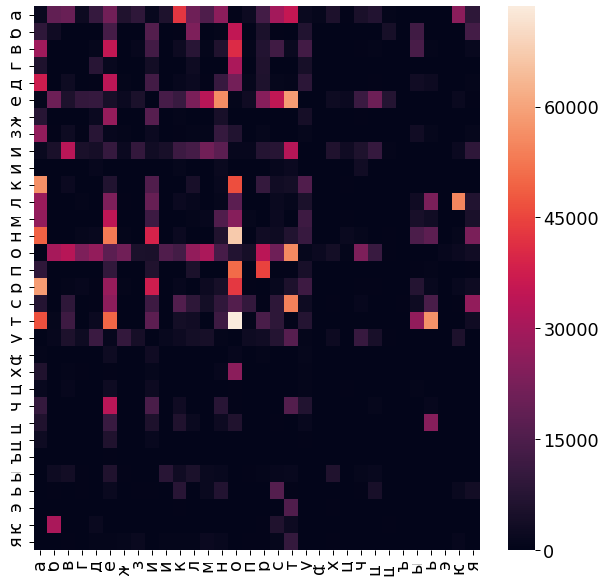

In [173]:
fig, ax = plt.subplots()
ax = sns.heatmap(sparseArray, fmt = '', xticklabels=x_axis_labels, yticklabels=x_axis_labels)

In [174]:
sparDf = pd.DataFrame(sparseArray)

In [175]:
sparDf.columns = x_axis_labels
sparDf.index = x_axis_labels

In [176]:
avg = sparDf.mean().mean()

In [177]:
spRDf = sparDf.drop(sparDf[sparDf.mean() < avg].index)

In [178]:
spRDf = spRDf.drop(spRDf.columns[spRDf.mean() < avg], axis=1)


In [179]:
spRDf

,а,б,в,д,е,и,к,л,м,н,...,р,с,т,у,ч,ш,ы,ь,ю,я
а,1978.0,18663.0,19686.0,10628.0,21409.0,1712.0,42538.0,20817.0,15098.0,25993.0,...,13201.0,29860.0,35444.0,1762.0,4943.0,6710.0,8.0,15.0,25661.0,8837.0
е,888.0,20445.0,5624.0,10611.0,4472.0,241.0,11082.0,22792.0,33432.0,56153.0,...,24872.0,34995.0,58675.0,153.0,11270.0,20411.0,4.0,35.0,1833.0,428.0
и,1882.0,4953.0,33374.0,4041.0,10410.0,3217.0,11714.0,13431.0,21332.0,17510.0,...,7157.0,7686.0,32890.0,231.0,6019.0,10352.0,5.0,23.0,2125.0,9065.0
к,56772.0,26.0,2072.0,49.0,6590.0,15431.0,232.0,4629.0,260.0,1447.0,...,10136.0,3238.0,3800.0,15397.0,13.0,13.0,3.0,7.0,45.0,13.0
л,28417.0,133.0,90.0,178.0,23284.0,19374.0,2252.0,1353.0,79.0,969.0,...,19.0,1725.0,989.0,5347.0,113.0,62.0,2994.0,22918.0,55005.0,6417.0
н,49333.0,119.0,71.0,1708.0,53043.0,39055.0,2175.0,119.0,91.0,6101.0,...,3219.0,2776.0,6410.0,10739.0,1123.0,58.0,14587.0,17595.0,932.0,22871.0
о,318.0,30206.0,33113.0,27201.0,17521.0,5015.0,13026.0,26908.0,31079.0,13655.0,...,33753.0,20687.0,55529.0,893.0,23500.0,10945.0,10.0,20.0,2149.0,3218.0
р,58719.0,253.0,823.0,515.0,27816.0,37617.0,1411.0,195.0,2318.0,4450.0,...,196.0,1437.0,5513.0,11956.0,387.0,518.0,6927.0,1697.0,1584.0,2627.0
с,6991.0,246.0,8958.0,471.0,26056.0,11891.0,15599.0,8750.0,3788.0,9220.0,...,572.0,8639.0,54074.0,2855.0,1198.0,180.0,2661.0,14245.0,438.0,26820.0
т,46784.0,943.0,11831.0,2024.0,49964.0,17719.0,3820.0,3344.0,284.0,11934.0,...,14243.0,8799.0,326.0,6939.0,254.0,37.0,26849.0,57127.0,223.0,2899.0


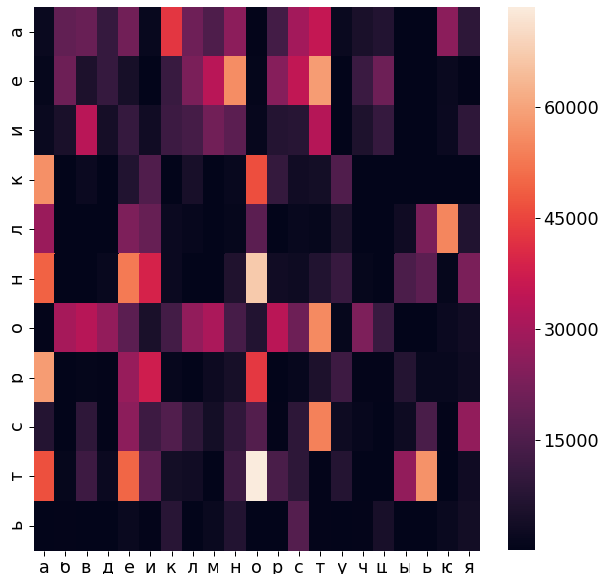

In [180]:
fig, ax = plt.subplots()
ax = sns.heatmap(spRDf, fmt = '')

In [181]:
def generateSparseSame(depth):
    sparseDimension = dict()
    everyL = 0
    partL = 0
    for phrase in phrases:
        words = phrase.split(' ')
        for word in words:
            length = len(word)
            if length > depth:
                for i,letter in enumerate(word):
                    everyL += 1
                    if i+depth < length:
                        if word[i+depth] in [s for s in groups if letter in s][0]:
                            incOrAdd((letter,word[i+depth]), sparseDimension)
                            partL += 1
                            
    return (sparseDimension, everyL, partL)
                

In [182]:
buffer = generateSparseSame(1)
sameSparse = buffer[0]
summ = buffer[1]
part = buffer[2]


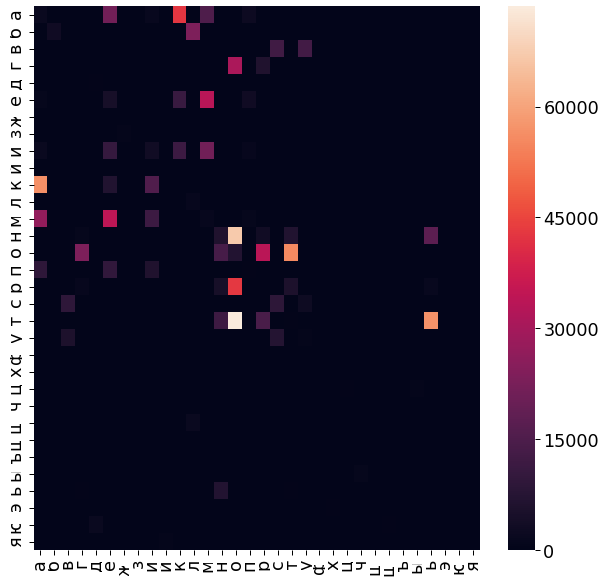

In [183]:
sparseSameArray = np.zeros((delta, delta))
for key in sameSparse:
    sparseSameArray[ord(key[0])-offset][ord(key[1])-offset] = sameSparse[key]
fig, ax = plt.subplots()
ax = sns.heatmap(sparseSameArray, fmt = '', xticklabels=x_axis_labels, yticklabels=x_axis_labels)

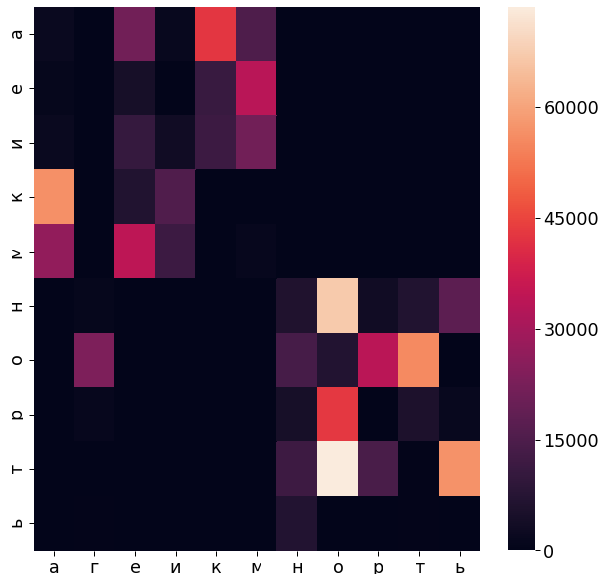

In [184]:
sparSameDf = pd.DataFrame(sparseSameArray)
sparSameDf.columns = x_axis_labels
sparSameDf.index = x_axis_labels
avgSame = sparSameDf.mean().mean()
sSamepRDf = sparSameDf.drop(sparSameDf[sparSameDf.mean() < avgSame].index)
sSamepRDf = sSamepRDf.drop(sSamepRDf.columns[sSamepRDf.mean() < avgSame], axis=1)
fig, ax = plt.subplots()
ax = sns.heatmap(sSamepRDf, fmt = '')

In [185]:
'''sSamepRDf[sSamepRDf.index == 'jj'].sum(axis=1).array[0]'''

"sSamepRDf[sSamepRDf.index == 'jj'].sum(axis=1).array[0]"

In [186]:
sSamepRDf[sSamepRDf.index == 'jj'].sum().aggregate('sum')


0.0

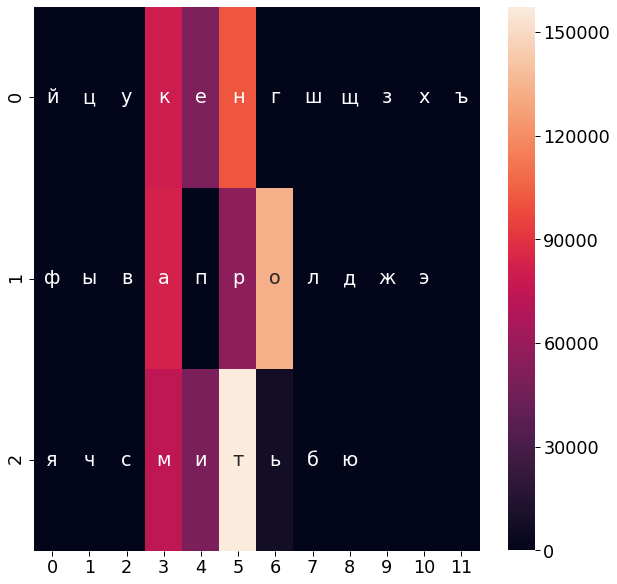

In [187]:
depth = []
for row in labels: 
    drow = []
    for label in row:
        if label != '':
            drow.append(sSamepRDf[sSamepRDf.index == label].sum().aggregate('sum'))
        else: 
            drow.append(0)
    depth.append(drow)
fig, ax = plt.subplots()
ax = sns.heatmap(np.array(depth), annot = np.array(labels), fmt = '')

In [188]:
part/summ

0.18046580988179323

In [189]:
'''matcher function takes label and returns depth'''
def drawLayout(labels, matcher, collapse): 
    depth = []
    for row in labels: 
        if collapse == 1:
            if row != '':
                depth.append(matcher(row))
            else: 
                depth.append(0)
        else:
            drow = []
            for label in row:
                if label != '':
                    drow.append(matcher(label))
                else: 
                    drow.append(0)
            depth.append(drow)
    fig, ax = plt.subplots()
    if collapse == 1:   
        ax = sns.heatmap(np.array([[x] for x in depth]),annot = np.array([[x] for x in labels]),fmt = '')
    else:
        ax = sns.heatmap(np.array(depth),annot = np.array(labels),fmt = '')

In [190]:
def translationMatcher(label):
    return sSamepRDf[sSamepRDf.index == label].sum().aggregate('sum')

def translationMatcherZone(label):
    lablist = [x for x in label]
    return sSamepRDf[sSamepRDf.index.isin(lablist) ].sum().aggregate('sum')

def translationMatcherZoneFull(label):
    lablist = [x for x in label]
    return spRDf[spRDf.index.isin(lablist) ].sum().aggregate('sum')


def translationMatcherFull(label):
    lablist = [x for x in label]
    return sparDf[sparDf.index.isin(lablist) ].sum().aggregate('sum')

In [191]:
labelsZone = ['йфя', 'цыч', 'увс', 'камипе', 'нртгоь', 'шлб', 'щдю', 'зжхэъ']

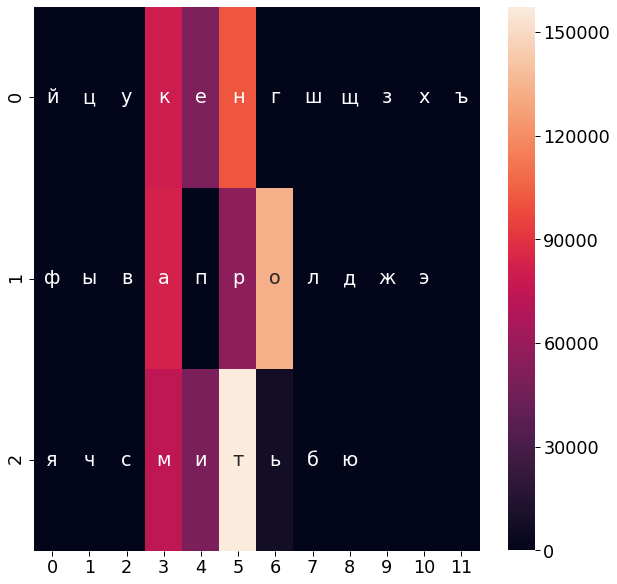

In [192]:
drawLayout(labels, translationMatcher, 0)

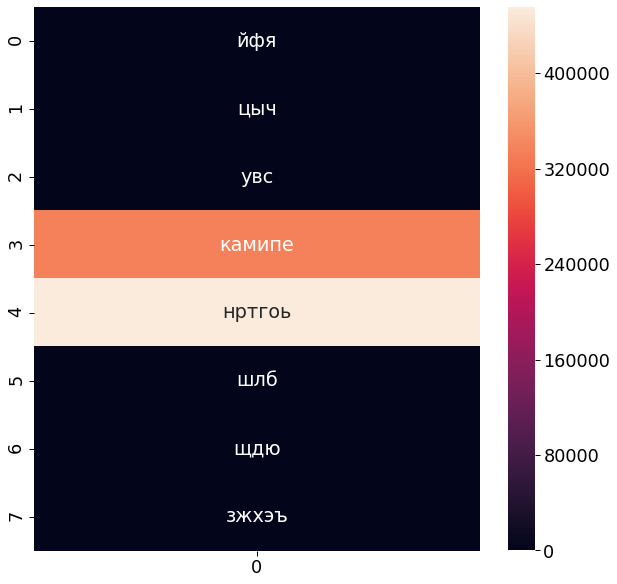

In [193]:
drawLayout(labelsZone, translationMatcherZone, 1)

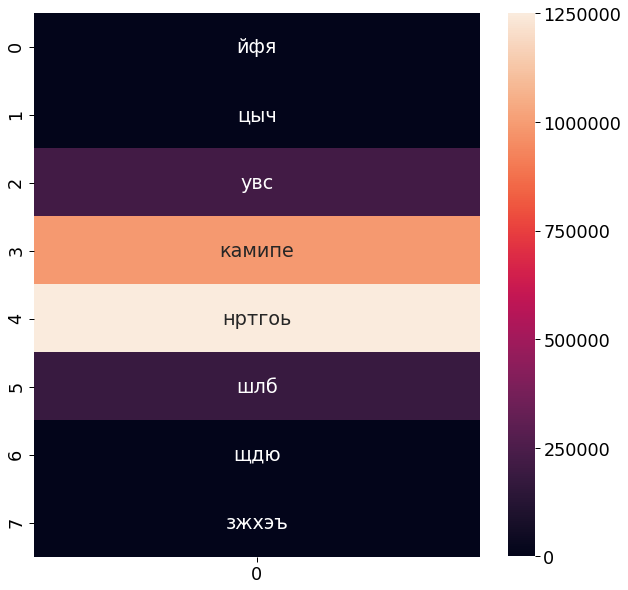

In [194]:
drawLayout(labelsZone, translationMatcherZoneFull, 1)

In [195]:
np.array([1,2,3]).shape

(3,)

In [196]:
def calcUniformity(zones, transDf): #returns summ of positive differences between each zone and average divided by total cases
    def prepUniform(): #returns array of cases by each zone
        calculatedZones = []
        for zone in zones:
            lablist = [x for x in zone]
            calculatedZones.append(transDf[transDf.index.isin(lablist)].sum().aggregate('sum'))
        return calculatedZones
    cZones = prepUniform()
    avgLoad = sum(cZones) / len (cZones)
    positiveDelta = [x - avgLoad for x in cZones if x > avgLoad]
    return sum(positiveDelta)/transDf.sum().aggregate('sum')

In [197]:
calcUniformity(labelsZone, sparDf)

0.3972855371193979

In [198]:
partsY =  ['йфяцычувскамипе', 'нртгоьшлбщдюзжхэъ']

In [199]:
def calcAlteration(parts, transDf): #returns percentage of cases that are not alterated between hands
    case = 0
    for i, part in enumerate(parts):
        lablist = [x for x in part]
        labOplist = [x for x in parts[i - len(parts)]]
        case += transDf[transDf.index.isin(lablist)][labOplist].sum().aggregate('sum')
    return 1- (case/transDf.sum().aggregate('sum'))

In [200]:
def prepDfToNp(Dframe):
    return (Dframe.index.to_numpy().astype(np.unicode_,1), Dframe.to_numpy().astype(np.float), Dframe.columns.to_numpy().astype(np.unicode_,1))

In [201]:
def IntersectionNp(main, sub):
    return  np.array([np.where(main == x) for x in sub]).flatten()

In [202]:
def NpSummIndexColumn(index, column, prepNp):
    ivalues = IntersectionNp(prepNp[0], index)
    cvalues = IntersectionNp(prepNp[2], column)
    arr = prepNp[1]
    agg = 0
    for i,ind in enumerate(arr):
        if i in ivalues:
            for c,col in enumerate(ind):
                if c in cvalues:
                    agg += col

    return agg

In [203]:
prts = convoluteParts(labels)
nptst = prepDfToNp(sparDf)
calcAlteration(prts, sparDf),NcalcAlteration(prts,nptst)

/home/hexagramg/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead
  


(0.5206742068155112, 0.5206742068155112)

In [204]:
zonets = convoluteZone(labels)
calcUniformity(zonets, sparDf),NcalcUniformity(zonets,nptst)

(0.3972855371193979, 0.3972855371193979)

In [205]:
#@jit
def NpSummIndex(index, prepNp):
    ivalues = IntersectionNp(prepNp[0], index)
    arr = prepNp[1]
    agg = 0
    for i,ind in enumerate(arr):
        if i in ivalues:
            for c,col in enumerate(ind):
                agg += col

    return agg

In [206]:
#@jit
def NcalcUniformity(zones, prepNp): #returns summ of positive differences between each zone and average divided by total cases
    def prepUniform(): #returns array of cases by each zone
        calculatedZones = []
        for zone in zones:
            lablist = [x for x in zone]
            calculatedZones.append(NpSummIndex(lablist,prepNp))
        return calculatedZones
    cZones = prepUniform()
    avgLoad = sum(cZones) / len (cZones)
    positiveDelta = [x - avgLoad for x in cZones if x > avgLoad]
    return sum(positiveDelta)/np.sum(prepNp[1])

In [207]:
#@jit
def NcalcAlteration(parts, prepNp): #returns percentage of cases that are not alterated between hands
    case = 0
    for i, part in enumerate(parts):
        lablist = [x for x in part]
        labOplist = [x for x in parts[i - len(parts)]]
        case += NpSummIndexColumn(lablist,labOplist,prepNp) 
    return 1- (case/np.sum(prepNp[1]))

In [208]:
calcAlteration(partsY, sparDf)

0.5206742068155112

In [209]:
def calcRepeats(zones, transDf): #returns percentage of cases that lead to repetition of zone
    depth = []
    for zone in zones:
        lablist = [x for x in zone]
        depth.append(transDf[transDf.index.isin(lablist)][lablist].sum().aggregate('sum'))
    return sum(depth)/transDf.sum().aggregate('sum')

In [210]:
#@jit
def NcalcRepeats(zones, prepNp): #returns percentage of cases that lead to repetition of zone
    depth = []
    for zone in zones:
        lablist = [x for x in zone]
        depth.append(NpSummIndexColumn(lablist,lablist,prepNp))
    return sum(depth)/np.sum(prepNp[1])

In [211]:
calcRepeats(labelsZone, sparDf),NcalcRepeats(zonets,nptst)

(0.2225897213256184, 0.2225897213256184)

In [251]:
#@jit
def NcalcProximity(labels, prepNp):
    cases = NpSummIndex(np.append(labels[1][0:4], labels[1][6:-2]), prepNp)
    return 1 - (cases/np.sum(prepNp[1]))

In [213]:
def calcProximity(labels, transDf):
    cases = transDf[transDf.index.isin(labels[1][0:4] + labels[1][6:-2])].sum().aggregate('sum')
    return 1 - (cases/transDf.sum().aggregate('sum'))

In [214]:
calcProximity(labels,sparDf),NcalcProximity(labels,nptst)

(0.6693012409079415, 0.6693012409079415)

In [215]:
def convoluteZone(labels): #returns array of str(letters) by finger zones
    newZone = []
    for x,row in enumerate(labels):
        i = 0
        for y,label in enumerate(row):
            if y in [4,6] or y > 9:
                newZone[i-1] += label
            else: 
                if x==0:
                    newZone.append(label)
                else:
                    newZone[i] += label
                    i += 1
    return newZone
            

In [216]:
convoluteZone(labels)

['йфя', 'цыч', 'увс', 'кеапми', 'нгроть', 'шлб', 'щдю', 'зхъжэ']

In [217]:
def convoluteParts(labels):
    newPart = []
    for x,row in enumerate(labels):
        i = -1
        for y,label in enumerate(row):
            if x==0 and (y==0 or y==5):
                newPart.append(label)
            else:
                if y==0 or y==5:
                    i+=1
                newPart[i] += label
    return newPart

In [218]:
convoluteParts(labels)

['йцукефывапячсми', 'нгшщзхъролджэтьбю']

In [219]:
def calcResults(labels, transDf):
    zones = convoluteZone(labels)
    parts = convoluteParts(labels)
    result = []
    result.append(calcUniformity(zones,transDf))
    result.append(calcAlteration(parts,transDf))
    result.append(calcRepeats(zones,transDf))
    result.append(calcProximity(labels,transDf))
    return result

In [220]:
#@jit
def NcalcResults(labels, prepNp):
    zones = convoluteZone(labels)
    parts = convoluteParts(labels)
    result = []
    result.append(NcalcUniformity(zones,prepNp))
    result.append(NcalcAlteration(parts,prepNp))
    result.append(NcalcRepeats(zones,prepNp))
    result.append(NcalcProximity(labels,prepNp))
    return result

In [221]:
def fullIteration(labels_, transDf):
    results = []
    def exchange(array, x,y,z,c):
        newArr = copy.deepcopy(array)
        newArr[x][y], newArr[z][c] = newArr[z][c], newArr[x][y]
        return newArr

    initResult = calcResults(labels_,transDf)
    multipliers = [1/x for x in initResult]
    sumInitResult = sum(initResult)

    for x, row in enumerate(labels_):
        for y, label in enumerate(row):
            for z, rowSec in enumerate(labels_):
                for c, labelSec in enumerate(rowSec):
                    if x != z and y != c and x >= z:

                        newLabels = exchange(labels_, x,y,z,c)
                        newResult = calcResults(newLabels, transDf)
                        weightedResult = [x*multipliers[i] for i,x in enumerate(newResult)]
                        sumNewResult =  sum(weightedResult)#newResult)
                        if sumNewResult < len(initResult): #sumInitResult:
                            weightedResult += [sumNewResult,x,y,z,c,label,labelSec]
                            results.append(weightedResult)
    return results

In [310]:
def exchange(array, x,y,z,c):
    newArr = copy.deepcopy(array)
    newArr[x][y], newArr[z][c] = newArr[z][c], newArr[x][y]
    return newArr

#@jit
def NfullIteration(labels_, prepNp, labelsInit):
    results = []
    initResult = NcalcResults(labelsInit,prepNp)
    multipliers = [1/x for x in initResult]
    sumInitResult = sum(initResult)
    for x, row in enumerate(labels_):
        for y, label in enumerate(row):
            for z, rowSec in enumerate(labels_):
                for c, labelSec in enumerate(rowSec):
                    if x != z and y != c and x >= z:

                        newLabels = exchange(labels_, x,y,z,c)
                        newResult = NcalcResults(newLabels, prepNp)
                        weightedResult = [x*multipliers[i] for i,x in enumerate(newResult)]
                        sumNewResult =  sum(weightedResult)#newResult)
                        if sumNewResult < len(initResult): #sumInitResult:
                            weightedResult += [sumNewResult,x,y,z,c,label,labelSec]
                            results.append(weightedResult)
    return results

In [223]:
test = fullIteration(labels, sparDf)

In [224]:
labels

[['й', 'ц', 'у', 'к', 'е', 'н', 'г', 'ш', 'щ', 'з', 'х', 'ъ'],
 ['ф', 'ы', 'в', 'а', 'п', 'р', 'о', 'л', 'д', 'ж', 'э', ''],
 ['я', 'ч', 'с', 'м', 'и', 'т', 'ь', 'б', 'ю', '', '', '']]

In [225]:
def dfResults(result):
    columns = ['Uniformity', 'Alteration', 'Repeats','Proximity', 'Summ', 'x', 'y', 'z', 'c', 'from', 'to']
    return pd.DataFrame(np.array(result), columns=columns)
    

In [226]:
calcResults(labels,sparDf)

[0.3972855371193979,
 0.5206742068155112,
 0.2225897213256184,
 0.6693012409079415]

In [227]:
dfFst = dfResults(test)

In [228]:
dfFst.sort_values(by=['Summ'])

,Uniformity,Alteration,Repeats,Proximity,Summ,x,y,z,c,from,to
165,0.8061095728692751,0.9310310041325154,0.7859431758737093,0.8849100258944022,3.407993778769902,2,5,1,0,т,ф
166,0.8276904590720745,0.9351104012798387,0.8057619760119533,0.8977200633522157,3.466282899716082,2,5,1,1,т,ы
64,0.8236697100649767,0.9139197654580985,0.9077378000202563,0.8953334169047352,3.5406606924480664,1,9,0,4,ж,е
155,0.807755195880619,0.9394174483390928,0.7965631124527136,1.0,3.5437357566724255,2,5,0,0,т,й
4,0.8282871656030275,0.9233199213313322,0.894231863568637,0.8980742579363027,3.5439132084392995,1,0,0,5,ф,н
...,...,...,...,...,...,...,...,...,...,...,...
121,1.0,1.031605396106383,0.9678854203755349,1.0,3.9994908164819183,2,2,1,10,с,э
242,1.0,1.0,0.9996470810575457,1.0,3.999647081057546,2,11,0,8,,щ
220,1.0,1.0,0.9996470810575457,1.0,3.999647081057546,2,9,0,8,,щ
231,1.0,1.0,0.9996470810575457,1.0,3.999647081057546,2,10,0,8,,щ


In [229]:
dfFst.sort_values(by=['Summ']).head(15)

,Uniformity,Alteration,Repeats,Proximity,Summ,x,y,z,c,from,to
165,0.8061095728692751,0.9310310041325154,0.7859431758737093,0.8849100258944022,3.407993778769902,2,5,1,0,т,ф
166,0.8276904590720745,0.9351104012798387,0.8057619760119533,0.8977200633522157,3.466282899716082,2,5,1,1,т,ы
64,0.8236697100649767,0.9139197654580985,0.9077378000202563,0.8953334169047352,3.5406606924480664,1,9,0,4,ж,е
155,0.807755195880619,0.9394174483390928,0.7965631124527136,1.0,3.5437357566724255,2,5,0,0,т,й
4,0.8282871656030275,0.9233199213313322,0.894231863568637,0.8980742579363027,3.5439132084392995,1,0,0,5,ф,н
171,0.8379327511739616,1.0,0.8095031256297464,0.9037997092131916,3.5512355860168996,2,5,1,9,т,ж
3,0.7918465317602901,1.0,0.8836495159894208,0.8764437335859458,3.5519397813356566,1,0,0,4,ф,е
156,0.8065699729083535,0.9352068177131271,0.813967863493459,1.0,3.5557446541149393,2,5,0,1,т,ц
172,0.8104081999177482,1.0,0.7672405602013935,1.0,3.577648760119142,2,5,1,10,т,э
161,0.8070871185685128,1.0,0.7720571728686777,1.0,3.5791442914371907,2,5,0,8,т,щ


In [230]:
dyctL = [['ц','ь','я','','','з','в','к','д','ч','ш','щ'],
         ['у','и','е','о','а','л','н','т','с','р','й',''],
         ['ф','э','х','ы','ю','б','м','п','г','ж','','']]

In [231]:
calcResults(dyctL,sparDf)

[0.21679225576016303,
 0.8141396848830118,
 0.04077063097770307,
 0.48337282831813655]

In [232]:
def comPute(label,transDf):

    def modifyLabel(x,y,z,c,labels):
        newLabels = copy.deepcopy(labels)
        newLabels[x][y], newLabels[z][c] = newLabels[z][c], newLabels[x][y]
        return newLabels

    def getCoordinates():
        return sortedDf[['x','y','z','c']].to_numpy().tolist()
    def transformCoord():
        newLb = []
        for cc in cordList:
            newLb.append(modifyLabel(int(cc[0]), int(cc[1]), int(cc[2]), int(cc[3]), label))
        return newLb

    result = fullIteration(label,transDf)
    
    sortedDf = dfResults(result).sort_values(by=['Summ']).head(3)
    cordList = getCoordinates()
    buffLabels = transformCoord()
    return buffLabels
    


In [311]:
def buffSorted(x):
    return x[1]

#@jit
def NcomPute(label, prepNp, labels_):

    def modifyLabel(cc,labels):
        x,y,z,c,summ = cc[0], cc[1], cc[2],cc[3], cc[4]
        newLabels = copy.deepcopy(labels)
        newLabels[x][y], newLabels[z][c] = newLabels[z][c], newLabels[x][y]
        return (newLabels, summ)

    cols = [('Uniformity',float), ('Alteration',float), ('Repeats',float),('Proximity',float), ('Summ',float), ('x',int), ('y',int), ('z',int), ('c',np.int), ('from',np.unicode_,1), ('to',np.unicode_,1)]
    result = NfullIteration(label,prepNp, labels_)
    tupylize = []
    for res in result:
        tupylize.append(tuple(res))
    sortedNp = np.array(tupylize, dtype=cols)
    sortedNp.sort(order='Summ')
    def getCoordinates():
        return sortedNp[:5][['x','y','z','c', 'Summ']]
    cordList = getCoordinates()

    def transformCoord():
        newLb = []
        for cc in cordList:
            newLb.append(modifyLabel(cc, label))
        return newLb

    buffLabels = transformCoord()
    return buffLabels
    


In [234]:
def iterateAlgo(labels, transDf, quanity):
    innerLabels = np.array([(innerLabesl,4)])
    historyLabels = np.empty_like(innerLabels)
    for i in range(quanity):
        buffLabels = np.empty_like(innerLabels)
        for label in range(len(innerLabels)):
            label = innerLabels[k][0]
            np.concatenate(buffLabels, comPute(label, transDf))
        np.concatenate(historyLabels, innerLabels)
        innerLabels = buffLabels
    historyLabels += innerLabels
    return historyLabels 


In [323]:
##@jit(forceobj=True,parallel=True)
def NiterateAlgo(labels_, prepNp, quanity):
    innerLabels = [(labels_,4)]
    historyLabels = []
    for i in range(0,quanity):
        buffLabels = []
        for k in range(0,len(innerLabels)):
            label = innerLabels[k][0]
            computed = NcomPute(label, prepNp, labels_)
            buffLabels = buffLabels + computed
        historyLabels = historyLabels+innerLabels
        sortLb= sorted(buffLabels, key=buffSorted)
        innerLabels = sortLb[:10]
    historyLabels += innerLabels
    return historyLabels 


In [324]:
sample = NiterateAlgo(labels, prepDfToNp(sparDf), 4)

/home/hexagramg/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead
  
/home/hexagramg/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  import sys


In [325]:
len(sample)


36

In [237]:
sum(NcalcResults(labels,nptst))

1.8098507061684692

In [238]:
def scaleLabels(initial,prepNp):
    initialResult = NcalcResults(initial, prepNp)
    multipliers = [1/x for x in initialResult]
    return len(initialResult) 

In [329]:
def NscaleLabelsArray(initial, derivatives, prepNp):
    initialResult = NcalcResults(initial, prepNp)
    multipliers = [1/x for x in initialResult]
    scaled = [ [y*multipliers[i] for i,y in enumerate(NcalcResults(x,prepNp))] for x in np.array(derivatives)[:,0]]
    return scaled

In [332]:
readysample = SIScaledToDf(addSummIndexToScaled(NscaleLabelsArray(labels,sample,nptst)))

In [334]:
readysample.sort_values(by=['Summ'])

,Uniformity,Alteration,Repeats,Proximity,Summ,Index
26,0.361490,0.935110,0.499803,0.691128,2.487531,26.0
28,0.387165,0.861033,0.549627,0.691128,2.488954,28.0
27,0.387165,0.861033,0.549627,0.691128,2.488954,27.0
29,0.426005,0.869840,0.513376,0.691128,2.500349,29.0
30,0.351021,0.928725,0.534633,0.691128,2.505507,30.0
31,0.380438,0.935110,0.499450,0.691128,2.506127,31.0
33,0.361490,0.952850,0.503447,0.691128,2.508915,33.0
32,0.361490,0.952850,0.503447,0.691128,2.508915,32.0
34,0.361490,0.952850,0.503447,0.691128,2.508915,34.0
35,0.387165,0.864531,0.572202,0.691128,2.515026,35.0


In [327]:
def scaleLabelsArray(initial, derivatives, transDf):
    initialResult = calcResults(initial, transDf)
    multipliers = [1/x for x in initialResult]
    scaled = [ [y*multipliers[i] for i,y in enumerate(calcResults(x,transDf))] for x in derivatives]
    return scaled

def addSummIndexToScaled(scaledArr):
    return [x+[sum(x),i] for i,x in enumerate(scaledArr)]

In [241]:
def SIScaledToDf(SIScaledArr):
    columns = ['Uniformity', 'Alteration', 'Repeats','Proximity', 'Summ', 'Index' ]
    return pd.DataFrame(np.array(SIScaledArr), columns=columns)

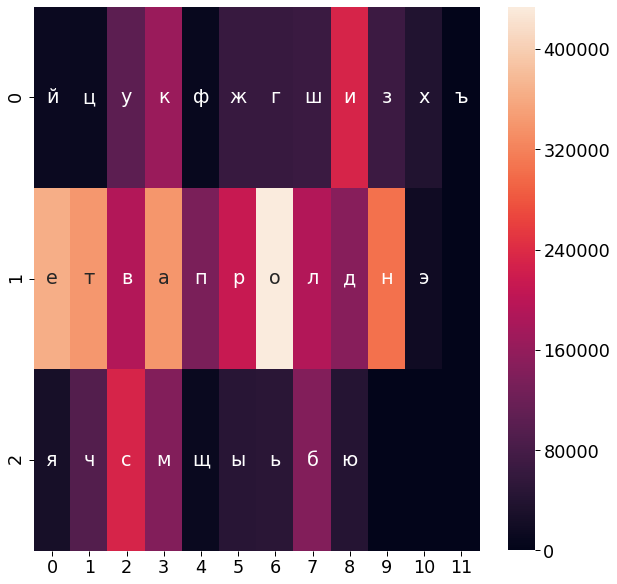

In [340]:
drawLayout(list(sample[30][0]), translationMatcherFull, 0)

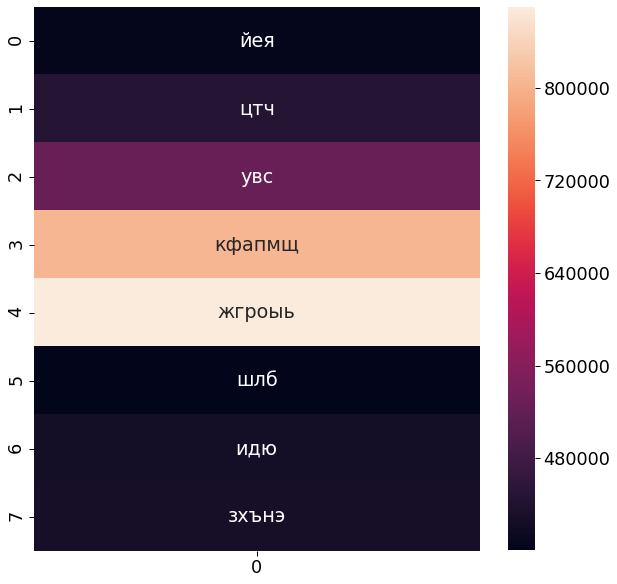

In [349]:

drawLayout(convoluteZone(list(sample[30][0])), translationMatcherFull, 1)

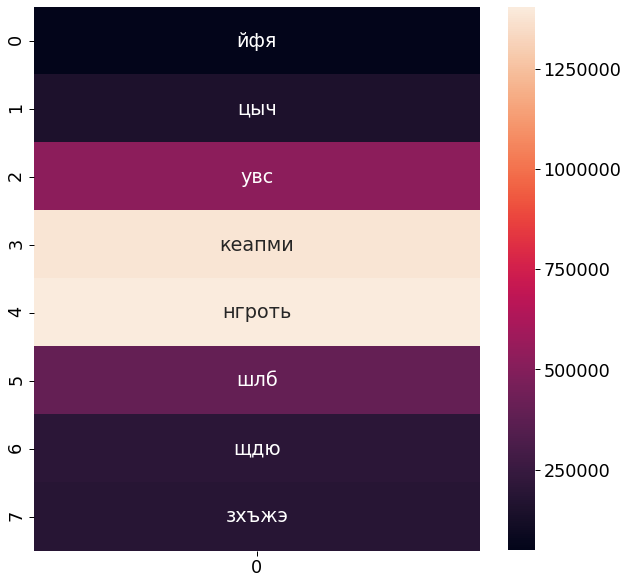

In [351]:
drawLayout(convoluteZone(list(sample[0][0])), translationMatcherFull, 1)

In [352]:
NcalcResults(labels,nptst)

[0.3972855371193979,
 0.5206742068155112,
 0.2225897213256184,
 0.6693012409079415]